# [Deep Learning](https://github.com/M-Sc-AUT/M.Sc-Computer-Architecture/tree/main/Deep%20Learning) - Spring 2024
#### [Reza Adinepour](https://github.com/rezaAdinepour)
#### Stu.ID: 402131055

## Question 1:
In this question we train a linearly separable data with multi layer perceptron

### import libraries

In [2]:
import torch
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import seaborn as sns

### check GPU availability

In [3]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(device)

cuda


### create data and split this
* training set: 80%
* testing set: 20%

In [7]:
x, y = datasets.make_blobs(n_samples=200, centers=[(-1, -1), (1, 1)], cluster_std=0.5)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# convert to the torch tensor
x_train = torch.tensor(x_train, dtype=torch.float).to(device)
y_train = torch.tensor(y_train, dtype=torch.long).to(device)

x_test = torch.tensor(x_test, dtype=torch.float).to(device)
y_test = torch.tensor(y_test, dtype=torch.long).to(device)

print("X training set size: ", x_train.size())
print("X testing set size: ", x_test.size())

X training set size:  torch.Size([160, 2])
X testing set size:  torch.Size([40, 2])


### plot data

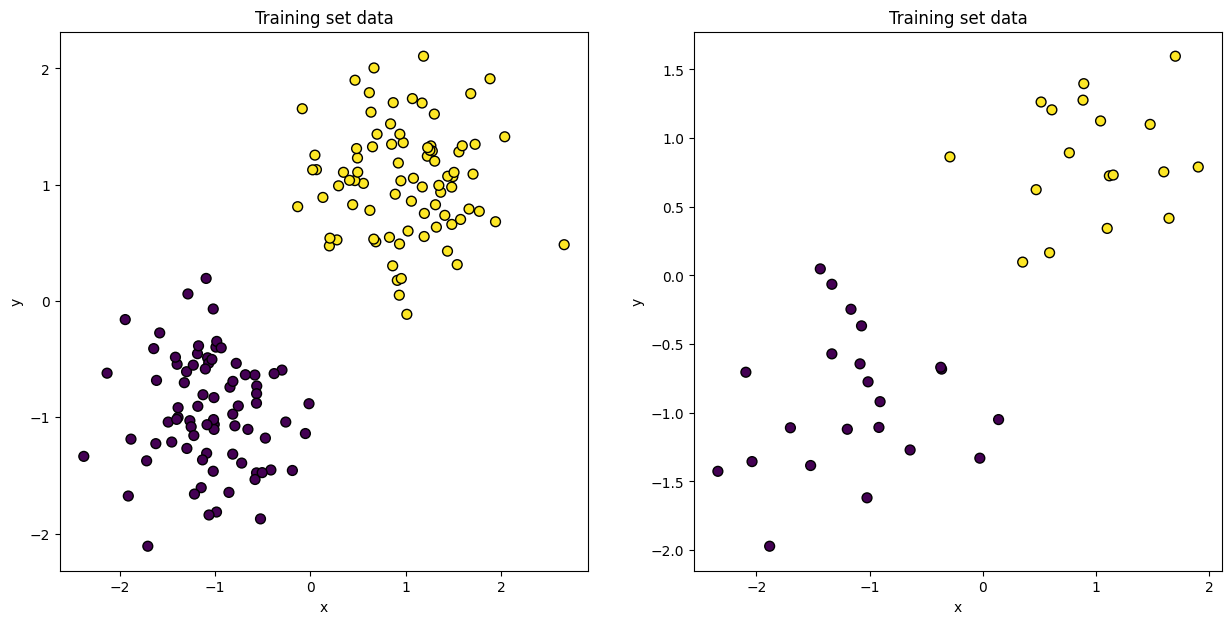

In [13]:
plt.figure(figsize=(15, 7))
plt.subplot(1, 2, 1)
plt.scatter(x_train[:, 0].cpu().numpy(), x_train[:, 1].cpu().numpy(), c=y_train.cpu().numpy(), edgecolors='k', marker='o', s=50)
plt.title("Training set data")
plt.xlabel('x')
plt.ylabel('y')

plt.subplot(1, 2, 2)
plt.scatter(x_test[:, 0].cpu().numpy(), x_test[:, 1].cpu().numpy(), c=y_test.cpu().numpy(), edgecolors='k', marker='o', s=50)
plt.title("Training set data")
plt.xlabel('x')
plt.ylabel('y')

plt.show()

### define MLP class with this structure:
* 3 layer neurons (input + hidden layer + output)
* softmax in output layer
* activation function in each layer: RelU

In [14]:
class MLP(nn.Module):
    def __init__(self, input_size, hidden_size, output_size=2, device='cpu'):
        super(MLP, self).__init__()
        self.layer1 = nn.Linear(input_size, hidden_size)
        self.layer2 = nn.Linear(hidden_size, output_size)
        self.device = torch.device(device)
        self.to(self.device)

    def forward(self, x):
        x = x.to(self.device)
        x = F.relu(self.layer1(x))
        x = self.layer2(x)
        return F.softmax(x, dim=1)

### set network parameters
* input layer neurons: 2
* hidden layer neurons: 2
* output layer neurons: 2
* optimizer: Adam
* loss function: binary cross-entropy
* number of epochs: 500
* learning rate: 0.01

In [15]:
model = MLP(input_size=2, hidden_size=2, output_size=2, device=device)

criterion = torch.nn.BCELoss() # set binary cross entropy for loss function
optimizer = torch.optim.Adam(model.parameters(), lr=0.01) # set adam optimizer

epochs = 500 # number of epochs

print("Network parameter:\n ", model)

Network parameter:
  MLP(
  (layer1): Linear(in_features=2, out_features=2, bias=True)
  (layer2): Linear(in_features=2, out_features=2, bias=True)
)


### create one hot label
because in the output we have 2 class

In [28]:
y_train_onehot = F.one_hot(y_train)
y_test_onehot = F.one_hot(y_test)

print("y_train_onehot: ", y_train_onehot.size())
print("y_test_onehot: ", y_test_onehot.size())

print("original labels: ", y_test)
print("onehot encoding labels: ")
print(y_test_onehot)

y_train_onehot:  torch.Size([160, 2])
y_test_onehot:  torch.Size([40, 2])
original labels:  tensor([1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
        0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1], device='cuda:0')
onehot encoding labels: 
tensor([[0, 1],
        [1, 0],
        [1, 0],
        [0, 1],
        [0, 1],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [0, 1],
        [0, 1],
        [0, 1],
        [1, 0],
        [0, 1],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [1, 0],
        [0, 1]], device='cuda:0')


### train phase

In [7]:
loss_values = []
accuracy_values = []

for epoch in range(epochs):
    outputs = model(x) # forward pass
    loss = criterion(outputs, y.long()) # compute loss
    
    # backward pass and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    loss_values.append(loss.item()) # save loss value
    
    # compute accuracy
    _, predicted = torch.max(outputs.data, 1)
    total = y.size(0)
    correct = (predicted == y.long()).sum().item()
    accuracy = correct / total

    accuracy_values.append(accuracy) # save accuracy value
    
    if ((epoch+1) % 5 == 0):
        print ("Epoch [{}/{}], Loss: {:.4f}, Accuracy: {:.2f}".format(epoch+1, epochs, loss.item(), accuracy))


Epoch [5/50], Loss: 0.6941, Accuracy: 0.50
Epoch [10/50], Loss: 0.6850, Accuracy: 0.50
Epoch [15/50], Loss: 0.6697, Accuracy: 0.94
Epoch [20/50], Loss: 0.6457, Accuracy: 0.94
Epoch [25/50], Loss: 0.6072, Accuracy: 0.97
Epoch [30/50], Loss: 0.5523, Accuracy: 0.99
Epoch [35/50], Loss: 0.4880, Accuracy: 1.00
Epoch [40/50], Loss: 0.4280, Accuracy: 1.00
Epoch [45/50], Loss: 0.3840, Accuracy: 1.00
Epoch [50/50], Loss: 0.3571, Accuracy: 1.00


### plot results

plot loss and accuracy

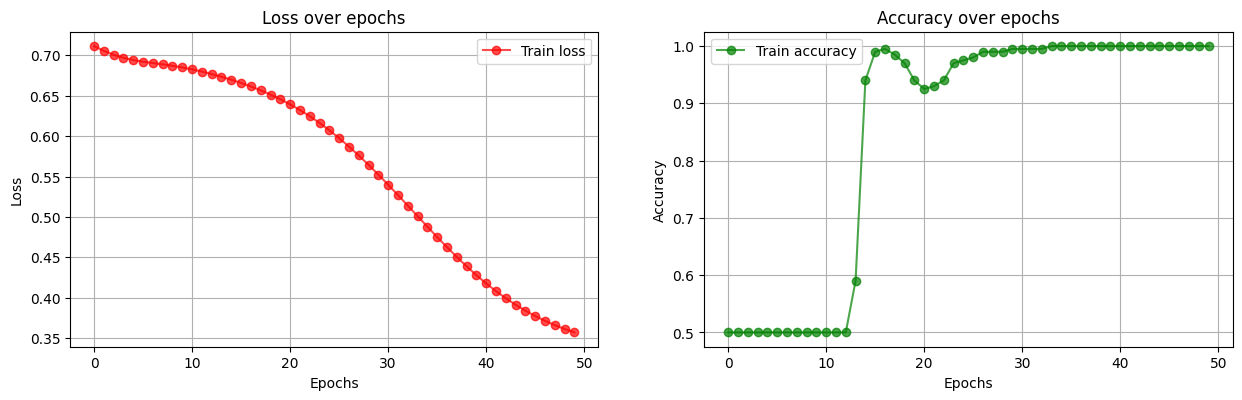

In [8]:
plt.figure(figsize=(15, 9))

# Plot loss values
plt.subplot(2, 2, 1)
plt.plot(loss_values, '-o', label="Train loss", color="red", alpha=0.7)
plt.title('Loss over epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.grid(True)
plt.legend()

# Plot accuracy values
plt.subplot(2, 2, 2)
plt.plot(accuracy_values, '-o', label='Train accuracy', color='green', alpha=0.7)
plt.title('Accuracy over epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()

plot confusion matrix

Text(50.722222222222214, 0.5, 'True class')

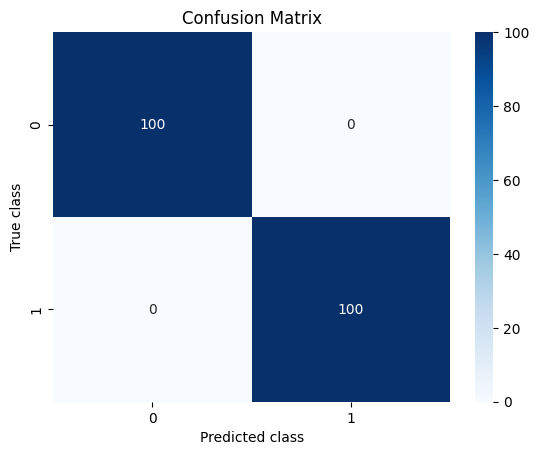

In [9]:
# compute confusion matrix
_, predicted = torch.max(model(x).data, 1)
cm = confusion_matrix(y.cpu().numpy(), predicted.cpu().numpy())

# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted class")
plt.ylabel("True class")

plot the decision boundary

Text(0, 0.5, 'y')

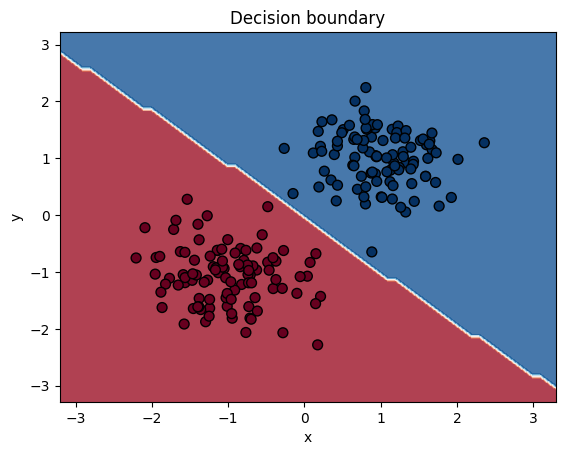

In [10]:
# make grid of points for coloring
x_min, x_max = x[:, 0].min() - 1, x[:, 0].max() + 1
y_min, y_max = x[:, 1].min() - 1, x[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min.item(), x_max.item(), 0.1),
                     np.arange(y_min.item(), y_max.item(), 0.1))

# predict the class for each point
grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()]).to(device)
preds = model(grid)
_, predicted = torch.max(preds.data, 1)

# reshape the predicted classes to have the same shape as xx
Z = predicted.cpu().numpy().reshape(xx.shape)

# plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8, cmap="RdBu")
plt.scatter(x[:, 0].cpu().numpy(), x[:, 1].cpu().numpy(), c=y.cpu().numpy(), cmap="RdBu", edgecolors='k', marker='o', s=50)
plt.title("Decision boundary")
plt.xlabel('x')
plt.ylabel('y')